## Problem:  
predict the amount of water flowing out of a dam 
using the change of water level in a reservoir

In [1]:
#load libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import fmin_cg

In [2]:
#config libs
pd.set_option('max_rows', 5)
%matplotlib inline
plt.rcParams['figure.figsize'] = 8, 4

In [3]:
#load data from .mat file
data = loadmat('ex5data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Nov  4 22:27:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]),
 'y': array([[ 2.13431051],
        [ 1.17325668],
        [34.35910918],
        [36.83795516],
        [ 2.80896507],
        [ 2.12107248],
        [14.71026831],
        [ 2.61418439],
        [ 3.74017167],
        [ 3.73169131],
        [ 7.62765885],
        [22.7524283 ]]),
 'Xtest': array([[-33.31800399],
        [-37.91216403],
        [-51.20693795],
        [ -6.13259585],
        [ 21.26118327],
        [-40.31952949],
        [-14.54153167],
        [ 32.55976024],
        [ 13.39343255],
        [ 44.20988595],
        [ -1.14267768],
        [-

In [4]:
#initialize train, validation and test data
X_train, y_train = data['X'], data['y']
X_test, y_test = data['Xtest'], data['ytest']
X_valid, y_valid = data['Xval'], data['yval']
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
print("X_valid shape:", X_valid.shape, "y_valid shape:", y_valid.shape)

X_train shape: (12, 1) y_train shape: (12, 1)
X_test shape: (21, 1) y_test shape: (21, 1)
X_valid shape: (21, 1) y_valid shape: (21, 1)


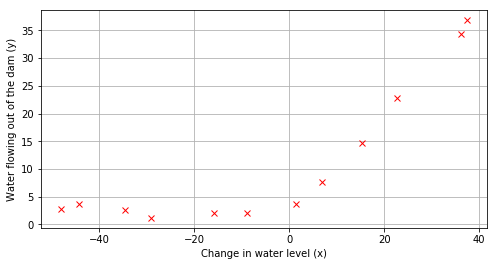

In [5]:
#visualize train data
def plot_data(X, y):
    #plt.scatter(x=X, y=y, marker='x', c='red')
    plt.plot(X, y, 'rx')
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    plt.grid(True)
    plt.show()
    
plot_data(X_train, y_train)

In [6]:
#set model variables
theta_initial = np.array([1, 1])
lmbda = 1

In [7]:
#insert intercept term into train data
X_train_int = np.insert(X_train, 0, 1, axis=1)
X_train_int

array([[  1.        , -15.93675813],
       [  1.        , -29.15297922],
       [  1.        ,  36.18954863],
       [  1.        ,  37.49218733],
       [  1.        , -48.05882945],
       [  1.        ,  -8.94145794],
       [  1.        ,  15.30779289],
       [  1.        , -34.70626581],
       [  1.        ,   1.38915437],
       [  1.        , -44.38375985],
       [  1.        ,   7.01350208],
       [  1.        ,  22.76274892]])

In [8]:
#insert intercept term into validation and test data
X_valid_int = np.insert(X_valid, 0, 1, axis=1)
X_test_int = np.insert(X_test, 0, 1, axis=1)
X_test_int

array([[  1.        , -33.31800399],
       [  1.        , -37.91216403],
       [  1.        , -51.20693795],
       [  1.        ,  -6.13259585],
       [  1.        ,  21.26118327],
       [  1.        , -40.31952949],
       [  1.        , -14.54153167],
       [  1.        ,  32.55976024],
       [  1.        ,  13.39343255],
       [  1.        ,  44.20988595],
       [  1.        ,  -1.14267768],
       [  1.        , -12.76686065],
       [  1.        ,  34.05450539],
       [  1.        ,  39.22350028],
       [  1.        ,   1.97449674],
       [  1.        ,  29.6217551 ],
       [  1.        , -23.66962971],
       [  1.        ,  -9.01180139],
       [  1.        , -55.94057091],
       [  1.        , -35.70859752],
       [  1.        ,   9.51020533]])

In [9]:
def h(X, theta):
    """ hypothesis function """
    return np.dot(X, theta)

In [10]:
def cost_function(theta, X, y, lmbda):
    m = X.shape[0]
    hypothesis = h(X, theta).reshape((m, 1)) # pack each element in array 
    J = float(1/(2*m) * np.dot((hypothesis - y).T, (hypothesis - y)))
    regularization = lmbda/(2*m) * np.dot(theta[1:], theta[1:])
    
    return J + regularization

#expected cost 303.993
cost_function(theta_initial, X_train_int, y_train, lmbda)

303.9931922202643

In [11]:
def gradient(theta, X, y, lmbda):
    m = X.shape[0]
    hypothesis = h(X, theta).reshape((m, 1))
    grad = float(1 / m) * np.dot((hypothesis - y).T, X)
    regularization = float(lmbda / m) * theta
    regularization[0] = 0 
    
    return (grad + regularization).flatten()

#expected [-15.30; 598.250].
gradient(theta_initial, X_train_int, y_train, lmbda)

array([-15.30301567, 598.25074417])

In [12]:
def optimize_theta(theta_initial, X, y, lmbda=0., print_output=True):
    """compute the optimal values of θ"""
    theta_opt = fmin_cg(cost_function, 
                        x0=theta_initial, 
                        fprime=gradient, 
                        args=(X, y, lmbda),
                        maxiter=1000,
                        epsilon=1.49e-12,
                        disp=print_output)
    return theta_opt

In [13]:
theta_opt = optimize_theta(theta_initial, X_train_int, y_train, 0)
theta_opt

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 18
         Function evaluations: 28
         Gradient evaluations: 28


array([13.08790734,  0.36777925])

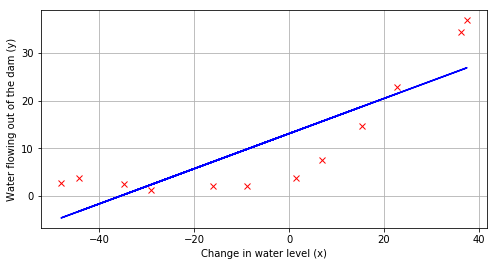

In [14]:
plt.plot(X_train, h(X_train_int, theta_opt).flatten(), c='blue')
plot_data(X_train, y_train)

# Learning curves

Print a chart that shows how error changes when the training set goes up. We need te have a matrix of: training set size (tss) 1 - error size, tss 2 - error size etc.. Reuse existing cost function and set lmbda to 0 so regularization == 0

> When you are computing the training set error, make sure you compute it on the training subset (i.e., X(1:n,:) and y(1:n)) (instead of the entire training set). However, for the cross validation error, you should compute it over the entire cross validation set. 

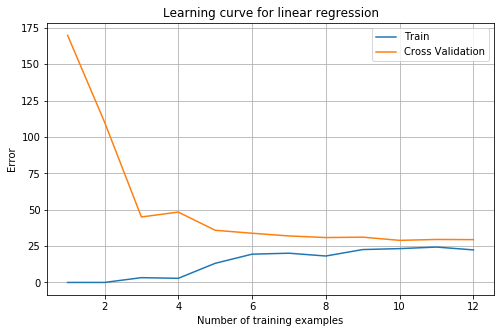

In [15]:
def plot_learning_curve():
    """
    Loop over first training point, then first 2 training points, then first 3 ...
    and use each training-set-subset to find trained parameters.
    With those parameters, compute the cost on that subset (Jtrain)
    remembering that for Jtrain, lambda = 0 (even if you are using regularization).
    Then, use the trained parameters to compute Jval on the entire validation set
    again forcing lambda = 0 even if using regularization.
    Store the computed errors, error_train and error_val and plot them.
    """
    initial_theta = np.array([[1.],[1.]])
    mym, error_train, error_val = [], [], []
    for x in range(1,13,1):
        train_subset = X_train_int[:x,:]
        y_subset = y_train[:x]
        mym.append(y_subset.shape[0])
        fit_theta = optimize_theta(initial_theta,train_subset,y_subset,lmbda=0.,print_output=False)
        error_train.append(cost_function(fit_theta,train_subset,y_subset,lmbda=0.))
        error_val.append(cost_function(fit_theta,X_valid_int,y_valid,lmbda=0.))
        
    plt.figure(figsize=(8,5))
    plt.plot(mym,error_train,label='Train')
    plt.plot(mym,error_val,label='Cross Validation')
    plt.legend()
    plt.title('Learning curve for linear regression')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.grid(True)
    
plot_learning_curve()

We can see that our model is too simple - both train and validation errors are high

# Polynomial regression

In [16]:
def generate_polynomial_features(X, p):
    """
    Maps the original training set X of size m × 1 into its higher powers.
    Specifically, when a training set X of size m × 1 is passed into the function, the function should return a m×p matrix X_poly,
    where column 1 holds the original values of X, column 2 holds the values of X.^2, column 3 holds the values of X.^3, and so on.
    """
    X_poly = X.copy()
    #skip column 0 with 1s (intercept term) and column 1 (power of 1 == Xi)
    #add to range so outer bound is included
    for i in range(2, p + 1):
        power = np.power(X[:, 1], i)
        X_poly = np.insert(X_poly, X_poly.shape[1], power, axis=1)
        
    return X_poly

Test method generate_polynomial_features on integers

In [17]:
tmp = np.array([[1, 2], [1, 3], [1, 4]])
print(tmp)
print()
print(generate_polynomial_features(tmp, 4))

[[1 2]
 [1 3]
 [1 4]]

[[  1   2   4   8  16]
 [  1   3   9  27  81]
 [  1   4  16  64 256]]


In [18]:
def feature_normalize(X):
    """
    X array has 1st column of 1s (intercept term) - no need to normalize.
    Does feature normalizing on the columns (subtract mean, divide by standard deviation).
    Returns the feature-normalized X, and feature means and stds in a list
    IMPORTANT note: you should subtract the means, THEN compute std of the
    mean-subtracted columns. Does make a huge difference
    """

    X_norm = X.copy()
    X_mean = np.mean(X_norm, axis=0)
    X_norm[:, 1:] = X_norm[:, 1:] - X_mean[1:]
    X_std = np.std(X_norm, axis=0, ddof=1)
    X_norm[:, 1:] = X_norm[:, 1:] / X_std[1:]
            
    return X_norm, X_mean, X_std

In [19]:
#p = 8 #polynomial degree

#from https://github.com/kaleko/CourseraML/blob/master/ex5/ex5.ipynb
###############################################################
# My d=8 plot doesn't match the homework pdf, due to differences
# between scipy.optimize.fmin_cg and the octave version
# I see that in subokita's implementation, for fitting he gets the
# same results as I when using scipy.optimize.fmin_cg
# 
# The d=5 plot (up through x^6) shows overfitting clearly, so I'll
# continue using that
###############################################################

polynomial_degree = 6
X_poly = generate_polynomial_features(X_train_int, polynomial_degree)
print(X_poly)

[[ 1.00000000e+00 -1.59367581e+01  2.53980260e+02 -4.04762197e+03
   6.45059724e+04 -1.02801608e+06  1.63832436e+07]
 [ 1.00000000e+00 -2.91529792e+01  8.49896197e+02 -2.47770062e+04
   7.22323546e+05 -2.10578833e+07  6.13900035e+08]
 [ 1.00000000e+00  3.61895486e+01  1.30968343e+03  4.73968522e+04
   1.71527069e+06  6.20748719e+07  2.24646160e+09]
 [ 1.00000000e+00  3.74921873e+01  1.40566411e+03  5.27014222e+04
   1.97589159e+06  7.40804977e+07  2.77743990e+09]
 [ 1.00000000e+00 -4.80588295e+01  2.30965109e+03 -1.10999128e+05
   5.33448815e+06 -2.56369256e+08  1.23208064e+10]
 [ 1.00000000e+00 -8.94145794e+00  7.99496701e+01 -7.14866612e+02
   6.39194974e+03 -5.71533498e+04  5.11034273e+05]
 [ 1.00000000e+00  1.53077929e+01  2.34328523e+02  3.58705250e+03
   5.49098568e+04  8.40548715e+05  1.28669456e+07]
 [ 1.00000000e+00 -3.47062658e+01  1.20452489e+03 -4.18045609e+04
   1.45088020e+06 -5.03546340e+07  1.74762131e+09]
 [ 1.00000000e+00  1.38915437e+00  1.92974986e+00  2.68072045e+0

In [20]:
#normalize values
X_poly_norm,  X_mean, X_std = feature_normalize(X_poly)
X_poly_norm[:3, :]

array([[ 1.00000000e+00, -3.62140776e-01, -7.55086688e-01,
         1.82225876e-01, -7.06189908e-01,  3.06617917e-01,
        -5.90877673e-01],
       [ 1.00000000e+00, -8.03204845e-01,  1.25825266e-03,
        -2.47936991e-01, -3.27023420e-01,  9.33963187e-02,
        -4.35817606e-01],
       [ 1.00000000e+00,  1.37746700e+00,  5.84826715e-01,
         1.24976856e+00,  2.45311974e-01,  9.78359696e-01,
        -1.21556976e-02]])

In [21]:
theta_initial_poly = np.ones((X_poly.shape[1], 1))
theta_opt_poly = optimize_theta(theta_initial_poly, X_poly_norm, y_train)
theta_opt_poly

Optimization terminated successfully.
         Current function value: 0.198053
         Iterations: 101
         Function evaluations: 192
         Gradient evaluations: 192


array([ 11.21758059,  11.36694926,  13.42850709,  10.76356217,
        -4.36315877, -11.94562173,  -5.14791888])

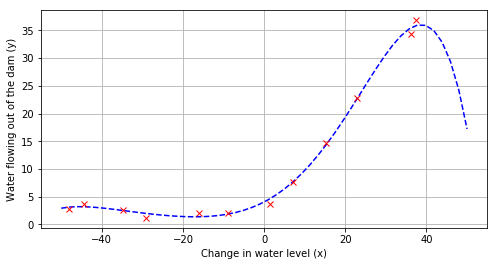

In [22]:
def plot_polynomial_fit(theta, means, stds):
    n_points_to_plot = 50
    x_vals = np.linspace(-50, 50, n_points_to_plot)
    
    x_mat = np.ones((n_points_to_plot, 1))
    x_mat = np.insert(x_mat, x_mat.shape[1], x_vals.T, axis=1)
    x_mat = generate_polynomial_features(x_mat, len(theta) - 1)
    
    #This is undoing feature normalization
    x_mat[:, 1:] = x_mat[:, 1:] - means[1:]
    x_mat[:, 1:] = x_mat[:, 1:] / stds[1:]
    plt.plot(x_vals, h(x_mat, theta), 'b--')
    plot_data(X_train, y_train)

plot_polynomial_fit(theta_opt_poly, X_mean, X_std)

/Users/bs/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/bs/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/bs/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


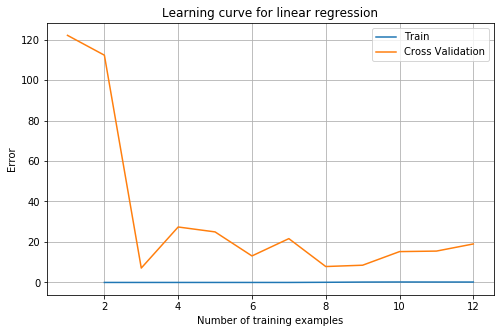

In [25]:
def plot_polynomial_learning_curve(lmbda=0.):
    theta_initial = np.ones((polynomial_degree + 1, 1))
    my_m, error_train, error_val = [], [], []
    X_polynomial = generate_polynomial_features(X_valid_int, polynomial_degree)
    X_normalized, _, _ = feature_normalize(X_polynomial)

    for i in range(1, X_train.shape[0] + 1):
        x_subset = X_train_int[:i, :]
        y_subset = y_train[:i]
        my_m.append(y_subset.shape[0])
        x_subset = generate_polynomial_features(x_subset, polynomial_degree)
        x_subset, _, _ = feature_normalize(x_subset)
        theta_opt = optimize_theta(theta_initial, x_subset, y_subset, lmbda, False)
        error_train.append(cost_function(theta_opt, x_subset, y_subset, lmbda))
        error_val.append(cost_function(theta_opt, X_normalized, y_valid, lmbda))
        
    plt.figure(figsize=(8,5))
    plt.plot(my_m,error_train,label='Train')
    plt.plot(my_m,error_val,label='Cross Validation')
    plt.legend()
    plt.title('Learning curve for linear regression')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.grid(True)
    
plot_polynomial_learning_curve()